In [175]:
%%cmd
pip install deap
pip3 install networkx

Microsoft Windows [Versione 10.0.19045.3448]
(c) Microsoft Corporation. Tutti i diritti sono riservati.

c:\Users\andre\Desktop\phd\graph_conjectures>pip install deap

c:\Users\andre\Desktop\phd\graph_conjectures>pip3 install networkx

c:\Users\andre\Desktop\phd\graph_conjectures>

You should consider upgrading via the 'd:\program files\python38\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'd:\program files\python38\python.exe -m pip install --upgrade pip' command.


In [176]:

import random
import numpy as np
import networkx as nx
from deap import base
from deap import creator
from deap import tools


creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
nnodes = 19
IND_SIZE=int(nnodes * (nnodes - 1)/2)

toolbox = base.Toolbox()
toolbox.register("attr_bin", random.randint,0,1)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_bin, n=IND_SIZE)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluateInd(individual):
    matrix = np.zeros((nnodes, nnodes,),int)
    idx = 0
    G = nx.Graph()
    G.add_nodes_from(range(nnodes))
    for i in range(nnodes):
        for j in range(i):
            matrix[i,j] = individual[idx]
            matrix[j,i] = individual[idx]
            if individual[idx]:
                G.add_edge(i,j)
                #G.add_edge(j,i)
            idx = idx + 1
    if not(nx.is_connected(G)):
        return 100,
    eigs = np.abs(np.linalg.eigvalsh(nx.adjacency_matrix(G).todense()))
    lambda_1 = np.max(eigs)
    mu = len(nx.max_weight_matching(G, maxcardinality=True))
    res =  mu + lambda_1
    return res,

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=2/IND_SIZE)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluateInd)

In [177]:
from deap import algorithms
pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, 
                                   stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std     	min    	max    
0  	300   	18.4417	0.684815	16.2878	20.4247
1  	159   	17.8682	0.544484	16.0003	19.5249
2  	196   	17.3466	0.477782	15.3391	18.5724
3  	170   	16.9421	0.502612	15.3391	18.188 
4  	176   	16.5254	0.492481	15.0128	17.6096
5  	182   	16.153 	0.490538	14.8173	17.5007
6  	180   	16.075 	4.87111 	14.8173	100    
7  	183   	15.4465	0.340835	14.3452	16.3913
8  	162   	15.1879	0.280637	14.2951	15.9395
9  	187   	14.9942	0.292673	14.0379	15.7019
10 	191   	14.7705	0.301049	14.0379	15.6484
11 	184   	14.5491	0.291996	13.7658	15.3902
12 	163   	14.6386	4.94289 	13.7069	100    
13 	154   	14.1714	0.210227	13.5516	14.8095
14 	167   	14.0382	0.22856 	13.251 	14.8244
15 	179   	13.8757	0.235857	13.2206	14.7309
16 	184   	13.6987	0.209951	13.1083	14.2869
17 	177   	13.5615	0.216537	12.9889	14.3034
18 	174   	13.4158	0.209498	12.8204	14.2996
19 	189   	13.2775	0.183411	12.7652	14.1561
20 	151   	13.1469	0.167817	12.71  	13.7239
21 	187   	13.0655	0.179642	12.5

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
18
(8.300344074967335,)
6
2.300344074967331


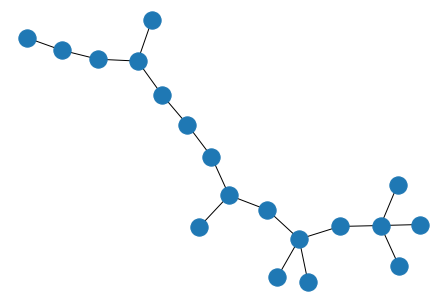

In [178]:
print(hof[0])
print(sum(hof[0]))
print(evaluateInd(hof[0]))

G = nx.Graph()
idx = 0
G.add_nodes_from(range(nnodes))
for i in range(nnodes):
    for j in range(i):
        if hof[0][idx]:
            G.add_edge(i,j)
            G.add_edge(j,i)
        idx = idx + 1
nx.draw_kamada_kawai(G)
print(len(nx.max_weight_matching(G, maxcardinality=True)))
print(np.max(np.real(nx.adjacency_spectrum(G))))